# Analysis_5 - Trial, Retention & Win-back FUNNEL

## 5.1 - Trial Funnel breakdown
###         5.1.1 - Preprocessing of Funnel analysis

In [ ]:
# Preprocessing of Funnel analysis
import os
import pandas as pd
from pathlib import Path

source_dir = r"C:\Users\user\Desktop\.....\PY_10_PYClean_Source_V7"
output_dir = r"C:\Users\user\Desktop\.....\PY_10_PYClean_Source_V8"

event_files = [
    "billing_issue_event.csv", "cancellation_event.csv", "expiration_event.csv",
    "initial_purchase_event.csv", "product_change_event.csv", "renewal_event.csv",
    "trial_cancelled_event.csv", "trial_converted_event.csv", "trial_started_event.csv",
    "uncancellation_event.csv"
]

# Read all files and add an "event_type" column
all_events = []

for file_name in event_files:
    file_path = os.path.join(source_dir, file_name)
    df = pd.read_csv(file_path)
    df["event_type"] = file_name.replace(".csv", "")  # pl. 'trial_started_event'
    all_events.append(df)

# Appending
event_log = pd.concat(all_events, ignore_index=True)

# Date conversion & sorting
event_log["event_datetime"] = pd.to_datetime(event_log["event_datetime"])
event_log.sort_values(by=["distinct_id", "event_datetime"], inplace=True)

# Result saving
Path(output_dir).mkdir(parents=True, exist_ok=True)
output_path = os.path.join(output_dir, "user_level_master.csv")
event_log.to_csv(output_path, index=False)

print("✅ user_level_master.csv successfully accessed.")

### 5.1.2 - Creating a conversion source dataset

In [ ]:
import os
import pandas as pd
from pathlib import Path

source_dir = r"C:\Users\user\Desktop\.....\PY_10_PYClean_Source_V8"
output_dir = r"C:\Users\user\Desktop\.....\PY_10_PYClean_Source_V9"

# Importing an Append dataset
append_file_path = os.path.join(source_dir, "user_level_master.csv")  
df = pd.read_csv(append_file_path)

# Event date conversion
df["event_datetime"] = pd.to_datetime(df["event_datetime"])

# Filter only the 3 events belonging to the funnel
funnel_events = ["trial_started_event", "trial_converted_event", "trial_cancelled_event"]
df_funnel = df[df["event_type"].isin(funnel_events)].copy()

# Select the earliest events at the user level
funnel_df = df_funnel.groupby(["distinct_id", "event_type"])["event_datetime"].min().reset_index()

# Pivot: create a column from event types
funnel_pivot = funnel_df.pivot(index="distinct_id", columns="event_type", values="event_datetime").reset_index()

# Optional: Rename columns to make them easier to remember
funnel_pivot.columns.name = None  # Remove the 'event_type' level
funnel_pivot = funnel_pivot.rename(columns={
    "trial_started_event": "trial_started_at",
    "trial_converted_event": "trial_converted_at",
    "trial_cancelled_event": "trial_cancelled_at"
})

# Event save
output_path = os.path.join(output_dir, "funnel_user_timeline.csv")
funnel_pivot.to_csv(output_path, index=False)

print(f"✅ Funnel table saved: {output_path}")

In [5]:
input_file = r"C:\Users\user\Desktop\......\PY_10_PYClean_Source_V9\funnel_user_timeline.csv"

conversion = pd.read_csv(input_file, sep=",")

conversion.head()

,distinct_id,trial_cancelled_at,trial_converted_at,trial_started_at
0,10645661814,2025-02-09 22:01:02,NaN,2025-02-09 21:47:06
1,11020132169,2025-02-05 02:47:02,NaN,2025-01-29 07:18:53
2,17847733001,NaN,2025-02-09 22:30:06,2025-02-03 06:28:00
3,18278059555,2025-01-23 23:11:06,2025-01-24 12:09:40,2025-01-17 12:09:31
4,19102289133,2025-01-02 22:53:05,NaN,2025-01-02 16:28:53


In [6]:
# Trial Funnel breakdown
import pandas as pd
import os

input_path = r"C:\Users\user\Desktop\.....\PY_10_PYClean_Source_V9\funnel_user_timeline.csv"
df = pd.read_csv(input_path, parse_dates=["trial_started_at", "trial_converted_at", "trial_cancelled_at"])

# Number of trial starters (for whom trial_started_at is not NaN)
start_count = df["trial_started_at"].notna().sum()

# Number of trial converters (who have trial_started_at AND trial_converted_at)
converted_count = df[df["trial_started_at"].notna() & df["trial_converted_at"].notna()].shape[0]

# Number of people canceling during trial
cancelled_count = df[df["trial_started_at"].notna() & df["trial_cancelled_at"].notna()].shape[0]

# Calculating ratios
conversion_rate = round(converted_count / start_count * 100, 2) if start_count else 0
cancellation_rate = round(cancelled_count / start_count * 100, 2) if start_count else 0

# Results announcement
print("📊 Conversion metrics (only for trial starters):")
print(f"- Number of trial starters: {start_count}")
print(f"- Trial → paying conversions: {converted_count} ({conversion_rate}%)")
print(f"- Canceling during trial: {cancelled_count} ({cancellation_rate}%)")


📊 Konverziós mutatók (csak trialt indítókra számítva):
- Trialt indítók száma: 19591
- Trial → fizető konverziók: 3384 (17.27%)
- Trial alatt lemondók: 15573 (79.49%)


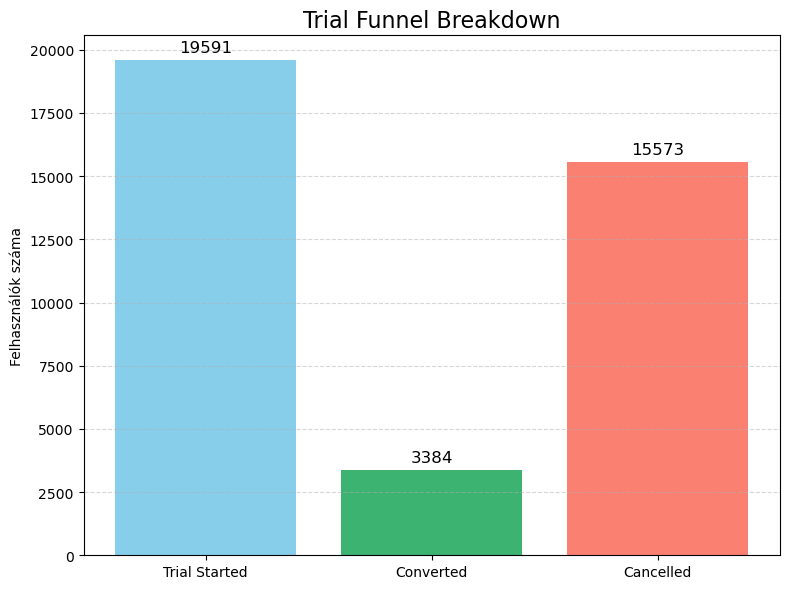

In [15]:
import matplotlib.pyplot as plt

# Datas
labels = ['Trial Started', 'Converted', 'Cancelled']
values = [start_count, converted_count, cancelled_count]
colors = ['skyblue', 'mediumseagreen', 'salmon']

# Create a chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)

# Add captions to columns
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height}', ha='center', va='bottom', fontsize=12)

# Title and axes
plt.title('Trial Funnel Breakdown', fontsize=16)
plt.ylabel('Number of users')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


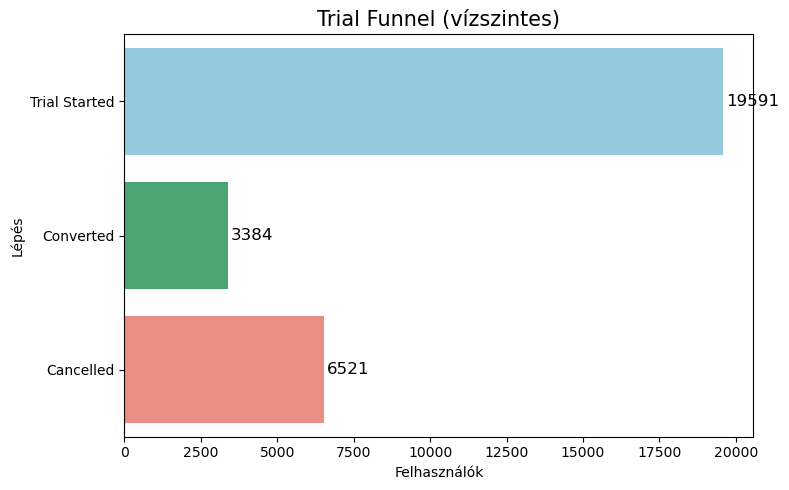

In [10]:
import seaborn as sns

# Data preparation
funnel_data = pd.DataFrame({
    'Lépés': ['Trial Started', 'Converted', 'Cancelled'],
    'Felhasználók': [start_count, converted_count, cancelled_count]
})

# Chart
plt.figure(figsize=(8, 5))
sns.barplot(data=funnel_data, x='Felhasználók', y='Lépés', palette=['skyblue', 'mediumseagreen', 'salmon'])

# Title and axes
plt.title('Trial Funnel (vízszintes)', fontsize=15)
for index, value in enumerate(funnel_data['Felhasználók']):
    plt.text(value + 100, index, str(value), va='center', fontsize=12)

plt.tight_layout()
plt.show()


## 5.2 - Retention Funnel

🔁 Retention Funnel eredmények (javítva):
Initial purchase users: 1481
Renewed users (retained): 689
Cancelled users (churned): 936
Retention rate: 46.52%
Churn rate: 63.2%


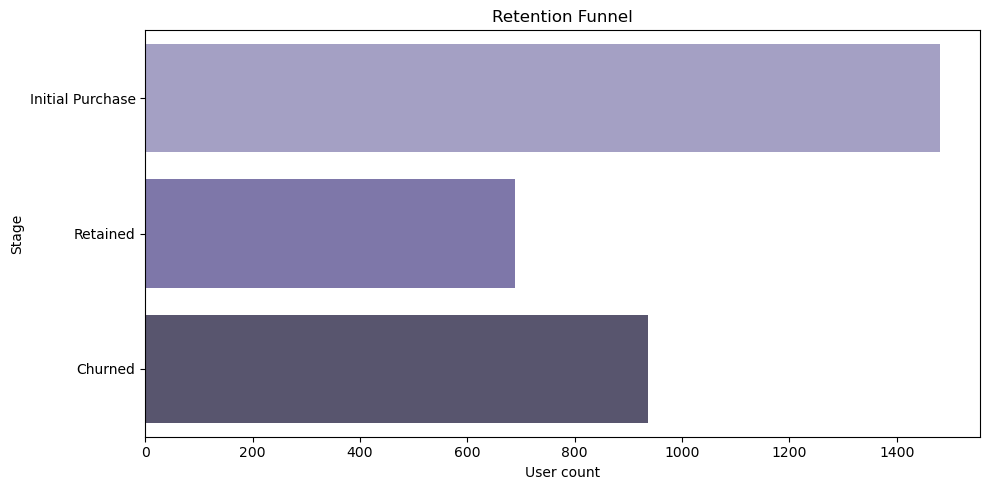

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define path
source_dir = r"C:\Users\user\Desktop\.....\PY_10_PYClean_Source_V7"

# Reading the three affected files
events = ['initial_purchase_event.csv', 'renewal_event.csv', 'cancellation_event.csv']
dfs = []

for file in events:
    file_path = os.path.join(source_dir, file)
    df = pd.read_csv(file_path)
    df['event'] = file.replace('.csv', '')
    dfs.append(df)

# Concatenate into a single DataFrame
retention_df = pd.concat(dfs, ignore_index=True)

# Extract unique users from each event
initial_users = set(retention_df[retention_df['event'] == 'initial_purchase_event']['distinct_id'])
renewal_users = set(retention_df[retention_df['event'] == 'renewal_event']['distinct_id'])
cancel_users = set(retention_df[retention_df['event'] == 'cancellation_event']['distinct_id'])

# Intersections – retention and churn
retained_users = initial_users & renewal_users
churned_users = initial_users & cancel_users

# Calculations
initial_count = len(initial_users)
retained_count = len(retained_users)
churned_count = len(churned_users)

# Ratios
retention_rate = round(retained_count / initial_count * 100, 2) if initial_count else 0
churn_rate = round(churned_count / initial_count * 100, 2) if initial_count else 0

# Results announcement
print("🔁 Retention Funnel eredmények (javítva):")
print(f"Initial purchase users: {initial_count}")
print(f"Renewed users (retained): {retained_count}")
print(f"Cancelled users (churned): {churned_count}")
print(f"Retention rate: {retention_rate}%")
print(f"Churn rate: {churn_rate}%")

# Preparation of diagram datas
funnel_data = pd.DataFrame({
    'Stage': ['Initial Purchase', 'Retained', 'Churned'],
    'Users': [initial_count, retained_count, churned_count]
})

# Diagram – horizontal bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='Users', y='Stage', data=funnel_data, palette='Purples_d')
plt.title('Retention Funnel')
plt.xlabel('User count')
plt.ylabel('Stage')
plt.tight_layout()
plt.show()


## 5.3 - Win-back Funnel

🔄 Win-back Funnel eredmények:
Cancelled users: 6521
Win-back users (re-engaged): 368
Win-back rate: 5.64%


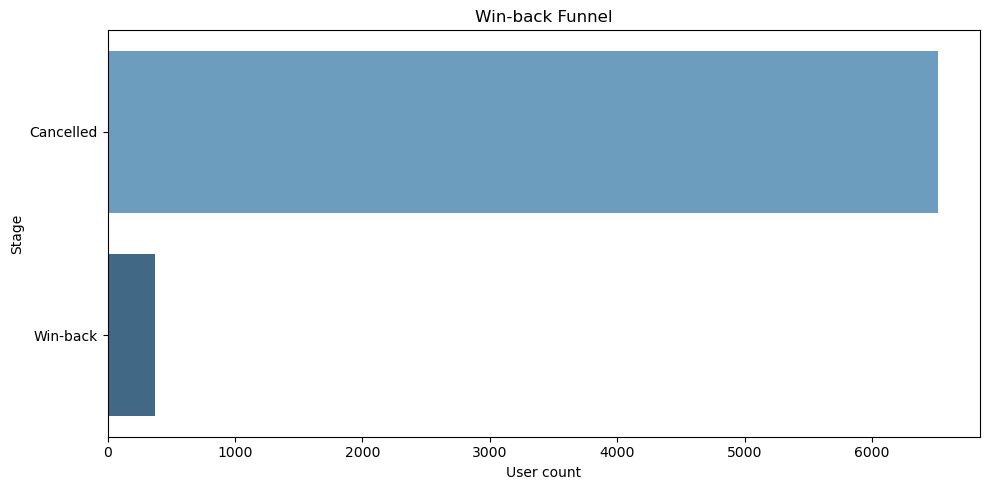

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

source_dir = r"C:\Users\user\Desktop\.....\PY_10_PYClean_Source_V7"

events = ['cancellation_event.csv', 'uncancellation_event.csv', 'product_change_event.csv']
dfs = []

for file in events:
    file_path = os.path.join(source_dir, file)
    df = pd.read_csv(file_path)
    df['event'] = file.replace('.csv', '')
    dfs.append(df)

# Join
winback_df = pd.concat(dfs, ignore_index=True)

# Defining unique users per event
cancelled_users = set(winback_df[winback_df['event'] == 'cancellation_event']['distinct_id'])
uncancelled_users = set(winback_df[winback_df['event'] == 'uncancellation_event']['distinct_id'])
product_changed_users = set(winback_df[winback_df['event'] == 'product_change_event']['distinct_id'])

# Returners = those who previously cancelled but have since either returned or made changes
winback_users = cancelled_users & (uncancelled_users | product_changed_users)

# Calculations
cancelled_count = len(cancelled_users)
winback_count = len(winback_users)

# Ratios
winback_rate = round(winback_count / cancelled_count * 100, 2) if cancelled_count else 0

# Results
print("🔄 Win-back Funnel eredmények:")
print(f"Cancelled users: {cancelled_count}")
print(f"Win-back users (re-engaged): {winback_count}")
print(f"Win-back rate: {winback_rate}%")

# Diagram
funnel_data = pd.DataFrame({
    'Stage': ['Cancelled', 'Win-back'],
    'Users': [cancelled_count, winback_count]
})

plt.figure(figsize=(10, 5))
sns.barplot(x='Users', y='Stage', data=funnel_data, palette='Blues_d')
plt.title('Win-back Funnel')
plt.xlabel('User count')
plt.ylabel('Stage')
plt.tight_layout()
plt.show()
